In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

data = pd.read_csv('/Users/mig/Downloads/non_linear.csv', sep=',')
data.head()

degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))


Качество на валидации: 0.119
Качество на обучении: 0.052


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.97797e-18): result may not be accurate.
  overwrite_a=True).T


In [2]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.070
Качество на обучении: 0.064


In [3]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.077
Качество на обучении: 0.058


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.80386e-22): result may not be accurate.
  overwrite_a=True).T


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7134369621139607, tolerance: 0.002448155578496404
  positive)


Качество на валидации Lasso: 0.093
Качество на обучении Lasso: 0.155
Качество на валидации Ridge: 0.079
Качество на обучении Ridge: 0.070


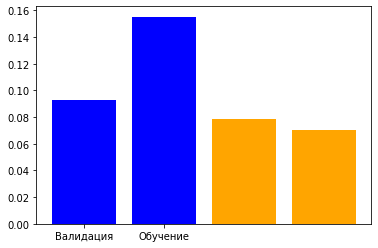

In [4]:
degree = 8
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model_lasso = Lasso(alpha=0.8).fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_valid)
y_pred_train_lasso = model_lasso.predict(X_train)
print("Качество на валидации Lasso: %.3f" % mean_squared_error(y_valid, y_pred_lasso))
print("Качество на обучении Lasso: %.3f" % mean_squared_error(y_train, y_pred_train_lasso))

model_ridge = Ridge(alpha=0.8).fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_valid)
y_pred_train_ridge = model_ridge.predict(X_train)
print("Качество на валидации Ridge: %.3f" % mean_squared_error(y_valid, y_pred_ridge))
print("Качество на обучении Ridge: %.3f" % mean_squared_error(y_train, y_pred_train_ridge))


together1 = [mean_squared_error(y_valid, y_pred_lasso), mean_squared_error(y_train, y_pred_train_lasso)]
together2 = [mean_squared_error(y_valid, y_pred_ridge), mean_squared_error(y_train, y_pred_train_ridge)]

import numpy as np

objects = ('Валидация', 'Обучение')
y_pos = np.arange(len(objects))

import matplotlib.pyplot as plt
plt.bar(y_pos, together1, align='center', color = 'blue')
plt.bar(y_pos+2, together2, align='center', color = 'orange')
plt.xticks(y_pos, objects)
plt.show()

In [5]:
W = np.linalg.inv(X.transpose() @ X + np.ones(8))@X.transpose()*y

Итарации остановлены на шаге 38


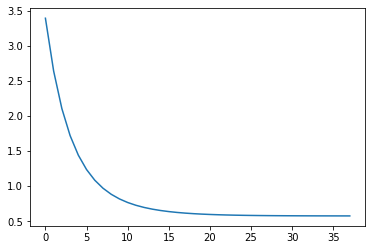

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('/Users/mig/Downloads/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.1, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

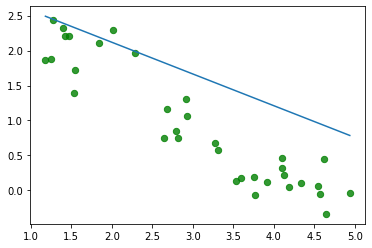

In [7]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)

y_linspace= sgd_regressor.predict(x_linspace.reshape(-1,1))

plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8, label='data')

plt.show()

Итарации остановлены на шаге 38


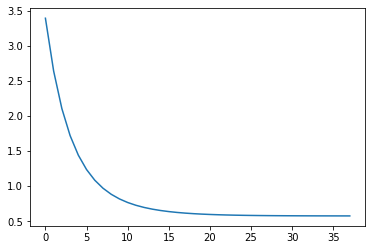

In [8]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.1, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.0001
weight_evolution, rmse_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(800)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итарации остановлены на шаге %d" % step); break
    rmse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid)))
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/mig/Downloads/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [21]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current, w_next)
    return (w_next, weight_evolution, grad)

def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.00618, grad=[-0.7426423   0.21453458]
step 200 |w-w_next|=0.00509, grad=[-0.61113951  0.17654605]
step 300 |w-w_next|=0.00419, grad=[-0.50292247  0.1452843 ]
step 400 |w-w_next|=0.00345, grad=[-0.41386788  0.1195582 ]
step 500 |w-w_next|=0.00284, grad=[-0.34058256  0.09838753]
step 600 |w-w_next|=0.00233, grad=[-0.28027418  0.08096563]
step 700 |w-w_next|=0.00192, grad=[-0.23064485  0.06662871]
step 800 |w-w_next|=0.00158, grad=[-0.1898036   0.05483048]
step 900 |w-w_next|=0.00130, grad=[-0.15619428  0.04512142]
step 1000 |w-w_next|=0.00107, grad=[-0.1285363   0.03713158]


In [29]:
import nltk
import string
import pandas as pd

def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    filtered_tokens = []
    # -- ВАШ КОД ТУТ --

    tokenized_str = nltk.word_tokenize(raw_text)
    filtered_tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    
    filtered_tokens = [i for i in filtered_tokens if ( i not in nltk.corpus.stopwords.words('english') )]
    
    # -----------------
    return filtered_tokens

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

df = pd.read_csv('/Users/mig/Downloads/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

df.tokenized.head()


[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


0    [wow, google, maps, mobile, v5, demo, sxsw, nice]
1    [google, name, built, gettinng, stuff, trying,...
2    [quot, apple, opening, temporary, store, austi...
3    [tech, apple, opening, pop-up, store, austin, ...
4              [gsdm, google, party, hook, sxsw, link]
Name: tokenized, dtype: object

In [33]:
import pandas as pd

df_valid = pd.read_csv('/Users/mig/Downloads/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

source_tweet_index = 14
print(df.iloc[source_tweet_index].tweet_text)

from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

import numpy as np

# отсортируем твиты по “похожести” - чем похожее на source_tweet_index,
# тем ближе к началу списка sorted_similarity
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

sorted_similarity

print(df_valid.iloc[0].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[1]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[2]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[3]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[4]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_similarity[5]].tweet_text)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
Wow! Google maps for mobile v5 demo at #sxsw. Very nice.
-------------
Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
#sxsw apple store run out for the day :( boo apple.
-------------
video from the popup Apple store: {link} #sxsw #sxswi
-------------
#SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
-------------
Wanting in line at the unconfirmed Apple pop-up store for an iPad 2. #sxsw


(array([20., 19., 19., 19., 20.]),
 array([  4. ,  23.2,  42.4,  61.6,  80.8, 100. ]),
 <a list of 5 Patch objects>)

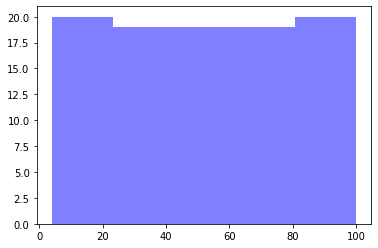

In [58]:
import matplotlib.pyplot as plt

plt.hist(sorted_similarity, bins=bins, facecolor='blue', alpha=0.5)